In [1]:
import pandas as pd

data = pd.read_csv("crime.csv", index_col="INCIDENTNEIGHBORHOOD")
data.drop("_id", inplace=True, axis=1)
data.drop("PK", inplace=True, axis=1)
data.drop("CCR", inplace=True, axis=1)
data.drop("AGE", inplace=True, axis=1)
data.drop("GENDER", inplace=True, axis=1)
data.drop("RACE", inplace=True, axis=1)
data.drop("ARRESTLOCATION", inplace=True, axis=1)
data.drop("INCIDENTLOCATION", inplace=True, axis=1)
data.drop("INCIDENTZONE", inplace=True, axis=1)
data.drop("INCIDENTTRACT", inplace=True, axis=1)
data.drop("COUNCIL_DISTRICT", inplace=True, axis=1)
data.drop("PUBLIC_WORKS_DIVISION", inplace=True, axis=1)
data.drop("X", inplace=True, axis=1)
data.drop("Y", inplace=True, axis=1)
data.head(10)

,ARRESTTIME,OFFENSES
INCIDENTNEIGHBORHOOD,,
Bloomfield,2016-08-24T12:20:00,3929 Retail Theft.
Outside City,2016-08-03T14:55:00,13(a)(16) Possession of Controlled Substance
Westwood,2016-08-03T16:45:00,3929 Retail Theft.
East Allegheny,2016-08-05T02:36:00,5503 Disorderly Conduct. / 5505 Public Drunken...
Crafton Heights,2016-08-06T02:00:00,2702 Aggravated Assault. / 2705 Recklessy Enda...
Greenfield,2016-08-15T13:30:00,3929 Retail Theft.
Brookline,2016-08-16T13:00:00,2701 Simple Assault.
Regent Square,2016-08-16T04:25:00,2701 Simple Assault. / 5505 Public Drunkenness...
East Liberty,2016-08-29T17:55:00,903 Criminal Conspiracy. / 3701 Robbery.


In [5]:
#Choose parameters for crime
#Top 5
#Retail theft 3929, 2706 Terroristic Threats, 2701 Simple Assault, 3701 Robbery, 3502 Burglory


In [8]:
# filter the data for top five crimes
specific_crimes = ['2701 Simple Assault.', '3502 Burglary.', '3701 Robbery.', '706 Terroristic Threats.', '3929 Retail Theft.']

crime_filter = data['OFFENSES'].isin(specific_crimes)

filtered_data = data[crime_filter]

print(filtered_data)

                               ARRESTTIME              OFFENSES
INCIDENTNEIGHBORHOOD                                           
Bloomfield            2016-08-24T12:20:00    3929 Retail Theft.
Westwood              2016-08-03T16:45:00    3929 Retail Theft.
Greenfield            2016-08-15T13:30:00    3929 Retail Theft.
Brookline             2016-08-16T13:00:00  2701 Simple Assault.
Carrick               2016-08-07T13:40:00  2701 Simple Assault.
...                                   ...                   ...
Overbrook             2023-08-27T14:30:00  2701 Simple Assault.
Shadyside             2023-08-26T13:27:00    3929 Retail Theft.
South Side Flats      2023-08-26T16:15:00    3929 Retail Theft.
East Liberty          2023-10-04T13:00:00    3929 Retail Theft.
Shadyside             2023-08-29T14:51:00    3929 Retail Theft.

[5783 rows x 2 columns]


In [9]:
crime_counts = filtered_data.groupby(['INCIDENTNEIGHBORHOOD', 'OFFENSES']).size().reset_index(name='COUNT')

print(crime_counts)

    INCIDENTNEIGHBORHOOD              OFFENSES  COUNT
0       Allegheny Center  2701 Simple Assault.     26
1       Allegheny Center        3502 Burglary.      3
2       Allegheny Center         3701 Robbery.      6
3         Allegheny West  2701 Simple Assault.      6
4         Allegheny West        3502 Burglary.      4
..                   ...                   ...    ...
272             Westwood        3502 Burglary.      1
273             Westwood         3701 Robbery.      1
274             Westwood    3929 Retail Theft.      7
275              Windgap  2701 Simple Assault.      9
276              Windgap        3502 Burglary.      3

[277 rows x 3 columns]


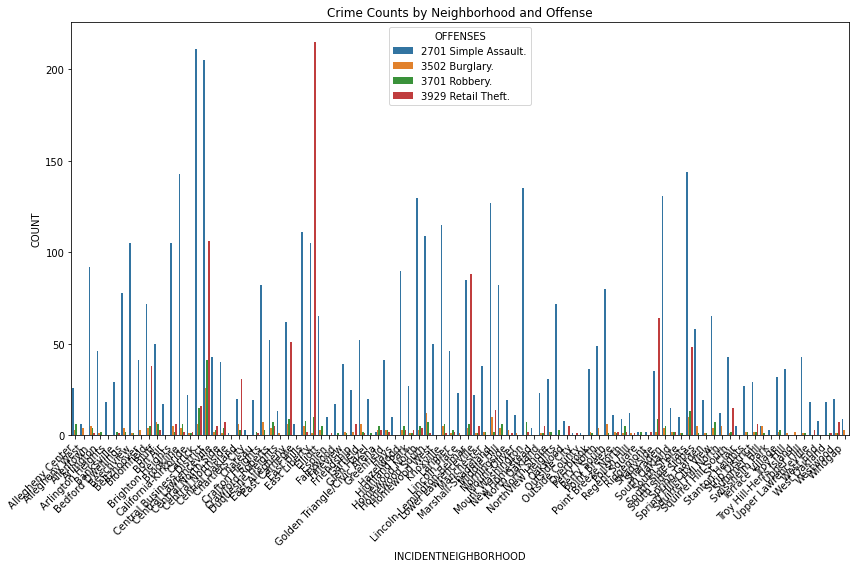

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 8))
sns.barplot(x='INCIDENTNEIGHBORHOOD', y='COUNT', hue='OFFENSES', data=crime_counts)
plt.title('Crime Counts by Neighborhood and Offense')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

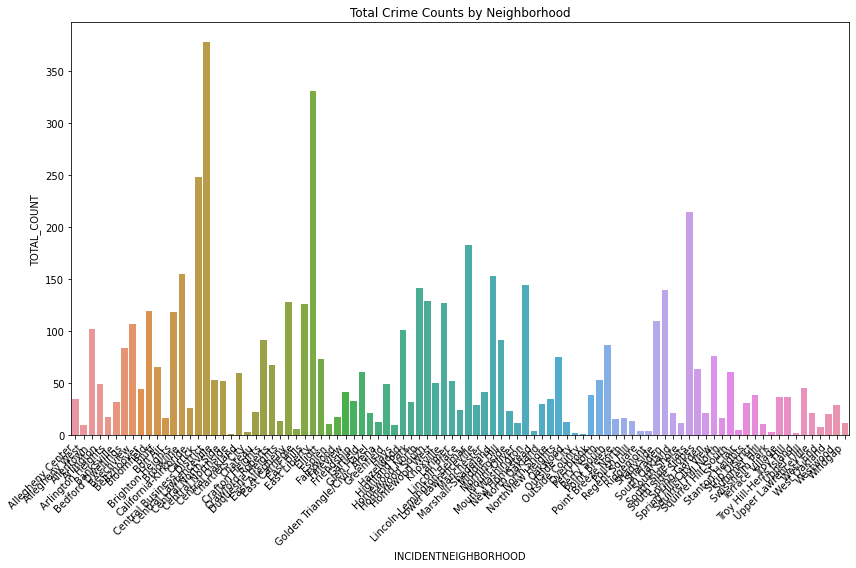

In [14]:
total_crime_counts = filtered_data.groupby('INCIDENTNEIGHBORHOOD').size().reset_index(name='TOTAL_COUNT')
plt.figure(figsize=(12, 8))
sns.barplot(x='INCIDENTNEIGHBORHOOD', y='TOTAL_COUNT', data=total_crime_counts)
plt.title('Total Crime Counts by Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

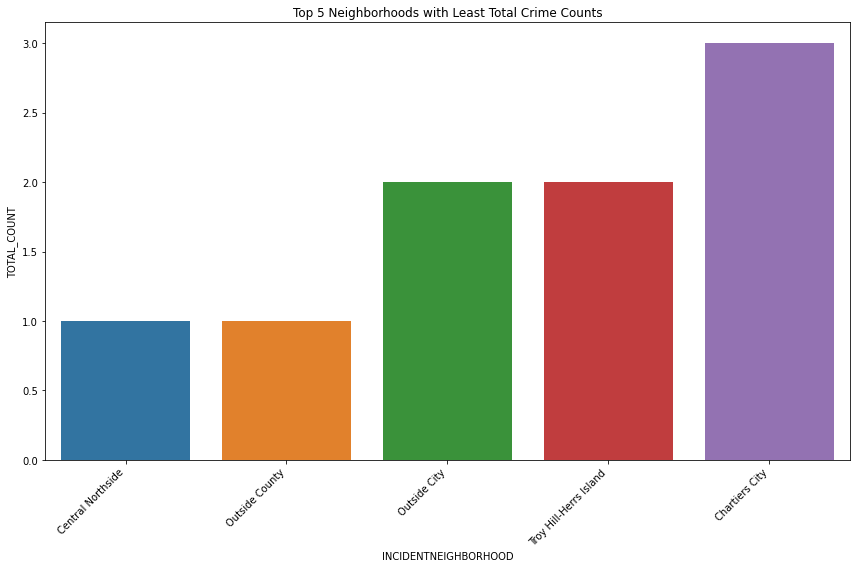

In [15]:
# Sorted by total crime counts in ascending order and selected the top 5
top5_least_crime_neighborhoods = total_crime_counts.sort_values(by='TOTAL_COUNT').head(5)

# Set up the plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='INCIDENTNEIGHBORHOOD', y='TOTAL_COUNT', data=top5_least_crime_neighborhoods)
plt.title('Top 5 Neighborhoods with Least Total Crime Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()